In [28]:
import pandas as pd
import scipy
import numpy as np 
import os #cwd tools 
import matplotlib.mlab as mlab
import seaborn as sns
from astropy.stats import sigma_clip
from matplotlib import pyplot as plt 
from scipy.optimize import curve_fit
from scipy import stats
from scipy import optimize
from scipy import interpolate
from scipy.stats import chi2_contingency

%matplotlib inline
sns.set()

In [29]:
# --- Plot Parameters --- 

# plt.rcParams.update({'font.size': 32})
# plt.rcParams["figure.figsize"] = (15, 10)
# plt.rcParams["font.family"] = "Times New Roman"

# params = {'axes.labelsize': 42,'axes.titlesize':30,  'legend.fontsize': 32, 'xtick.labelsize': 32, 'ytick.labelsize': 32}
# plt.rcParams.update(params)

In [30]:
# --- function definition --- 

def current(V, R):
    return (V/R)

def prob_scat(IP1, IP2, IS1, IS2): 
    return 1 - (IP1*IS2)/(IP2*IS1)

def prob_col(IP1, IP2, IS1, IS2):
    p = 1e-3 #Torr 
    l = 0.7 #cm 
    return (-p/l)*(np.log((IP1*IS2)/(IP2*IS1)))

def lin_func(a, b, x):
    return a*x + b

def func(a, x):
    return a*x

def quad_func(a, b, c, x):
    return a*(x**2) + b*(x) +c 

def cubic_func(a, b, c, d, x): 
    return a*(x**3) + b*(x**2) + c*(x) + d

def quin_func(a, b, c, d, e, f, x):
    return a*(x**5) + b*(x**4) + c*(x**3) + d*(x**2) + e*(x) + f

def mean_free(P):
    U = 1 - P 
    return -0.7/(np.log(U))

def good_fit(data): 
    stat, p, dof, expected = chi2_contingency(data) 

    # interpret p-value 
    alpha = 0.05
    print("p value is " + str(p)) 
    if p <= alpha: 
        print('Dependent (reject H0)') 
    else: 
        print('Independent (H0 holds true)') 

In [31]:
# --- data import --- 
voltage1, plate_voltage1, shield_voltage1  = np.loadtxt("forward_bias.dat", unpack = True) 
voltage2, plate_voltage2, shield_voltage2  = np.loadtxt("forward_bias_cooled.dat", unpack = True) 
voltage3, shield_voltage3  = np.loadtxt("reverse_bias_cooled.dat", unpack = True) 


# --- intial data manipulation --- 

IP1 = current(plate_voltage1, 10000)
IS1 = current(shield_voltage1, 100)

IP2 = current(plate_voltage2, 10000)
IS2 = current(shield_voltage2, 100)

vsq = np.sqrt(voltage1 - shield_voltage1 + plate_voltage1 + np.mean(voltage1))
P = prob_scat(IP1, IP2, IS1, IS2)
l = 0.7 #cm 
lam = mean_free(P)

# -- Reverse Polarity --- 


IS3 = current(shield_voltage3, 100)
print(shield_voltage3)
print(IS3)
LnIS3 = np.log(IS3)

[2.4  2.2  1.9  1.8  1.6  1.5  1.4  1.3  1.3  1.2  1.   0.8  0.7  0.6
 0.5  0.4  0.3  0.2  0.1  0.05]
[0.024  0.022  0.019  0.018  0.016  0.015  0.014  0.013  0.013  0.012
 0.01   0.008  0.007  0.006  0.005  0.004  0.003  0.002  0.001  0.0005]


In [32]:
# --- Data Manipulation for First Graph --- 

plate_current =  current(plate_voltage1[0:37], 10000)#y-axis 
plate_current_cooled = current(plate_voltage2[0:37], 10000) #y-axis 
plate_voltage = voltage1[0:37] #x-axis

t = shield_voltage1[0:37]*1e-3

cathode_plate_voltage = np.sqrt(plate_voltage - t)
# print(cathode_plate_voltage)

print(plate_current)
print(plate_current_cooled)

[3.00e-05 5.00e-05 1.20e-04 2.20e-04 3.40e-04 4.70e-04 5.90e-04 7.10e-04
 8.10e-04 9.00e-04 9.70e-04 1.02e-03 1.05e-03 1.07e-03 1.09e-03 1.08e-03
 1.07e-03 1.05e-03 1.03e-03 1.04e-03 1.01e-03 8.40e-04 7.70e-04 7.30e-04
 7.30e-04 7.30e-04 7.50e-04 7.70e-04 8.00e-04 8.60e-04 9.20e-04 1.00e-03
 1.10e-03 1.23e-03 1.40e-03 1.62e-03 1.92e-03]
[0.00029  0.00041  0.0005   0.00061  0.00073  0.00085  0.00096  0.0011
 0.00125  0.00141  0.00156  0.00172  0.0019   0.00207  0.00227  0.00246
 0.002635 0.00283  0.00288  0.00319  0.00338  0.00432  0.00534  0.0066
 0.00805  0.00967  0.01142  0.01326  0.01507  0.01679  0.01826  0.01995
 0.0217   0.0238   0.0262   0.0286   0.0309  ]


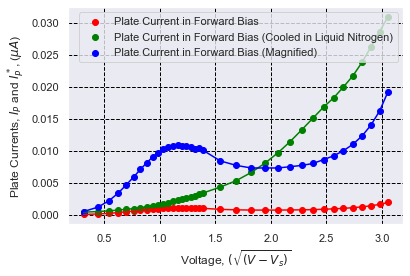

<Figure size 432x288 with 0 Axes>

In [33]:
# --- Plotting Graph --- 

plt.plot(cathode_plate_voltage, plate_current, color = 'red')
plt.plot(cathode_plate_voltage, plate_current_cooled, color = 'green')
plt.scatter(cathode_plate_voltage, plate_current, color = 'red', label = 'Plate Current in Forward Bias')
plt.scatter(cathode_plate_voltage, plate_current_cooled, color = 'green', label = 'Plate Current in Forward Bias (Cooled in Liquid Nitrogen)')
plt.plot(cathode_plate_voltage, plate_current*10, color = 'blue')
plt.scatter(cathode_plate_voltage, plate_current*10, color = 'blue', label = 'Plate Current in Forward Bias (Magnified)')


# plt.errorbar(temp, counts, xerr = None, yerr = std, ls='none', color = 'black') 
plt.xlabel("Voltage, $(\sqrt{(V - V_s)}$") 
plt.grid(b=True, which='major', color='black', linestyle='--')
plt.ylabel("Plate Currents, $I_P$ and $I_P^*$, ($\mu A$)")
plt.legend()
plt.show()

plt.savefig('compare.png', dpi = 300)

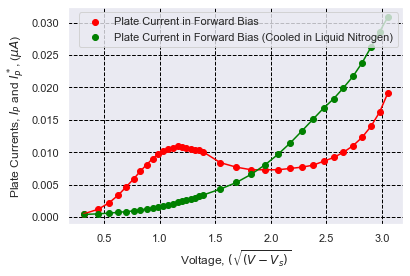

<Figure size 432x288 with 0 Axes>

In [34]:
# --- Plotting Graph --- 

plt.plot(cathode_plate_voltage, plate_current*10, color = 'red')
plt.plot(cathode_plate_voltage, plate_current_cooled, color = 'green')
plt.scatter(cathode_plate_voltage, plate_current*10, color = 'red', label = 'Plate Current in Forward Bias')
plt.scatter(cathode_plate_voltage, plate_current_cooled, color = 'green', label = 'Plate Current in Forward Bias (Cooled in Liquid Nitrogen)')

# plt.errorbar(temp, counts, xerr = None, yerr = std, ls='none', color = 'black') 
plt.xlabel("Voltage, $(\sqrt{(V - V_s)}$") 
plt.grid(b=True, which='major', color='black', linestyle='--')
plt.ylabel("Plate Currents, $I_P$ and $I_P^*$, ($\mu A$)")
plt.legend()
plt.show()

plt.savefig('compare.png', dpi = 300)

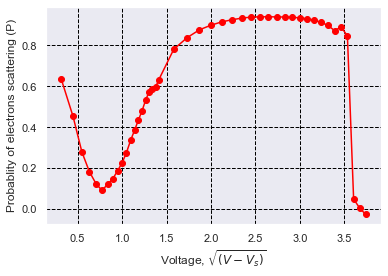

0.774587244924676


In [35]:
# --- Plotting Graph --- 
x = np.sqrt(voltage1 - shield_voltage1*1e-6)
# --- Cubic Spline --- 

data1 = np.array((x, P))

tck,u = interpolate.splprep(data1, s=0)
unew = np.arange(0, 1.01, 0.001)
out = interpolate.splev(unew, tck)

plt.scatter(x, P, color = 'red')
plt.plot(x, P, color='red')

plt.xlabel("Voltage, $\sqrt{(V - V_s)}$") 
plt.grid(b=True, which='major', color='black', linestyle='--')
plt.ylabel("Probablity of electrons scattering (P)")
plt.savefig('probvsvolt.png', dpi = 300)
plt.show()



print(x[6])

[  0.59825416   0.69615592   1.15748885   2.14274194   3.48559027
   5.32117628   7.35765861   5.43785507   4.39070399   3.39444078
   2.73011079   2.17323769   1.71259627   1.43965837   1.22594683
   1.06836208   0.92036914   0.82112624   0.78683041   0.76878449
   0.69765273   0.46063727   0.38420968   0.33461713   0.30525865
   0.28365585   0.269428     0.25817072   0.25101101   0.24887841
   0.24839244   0.24947798   0.25026564   0.25262576   0.25624843
   0.2622979    0.27209319   0.28702237   0.30651343   0.33988046
   0.31647802   0.37284894  13.91936222 181.24353243 -26.620057  ]


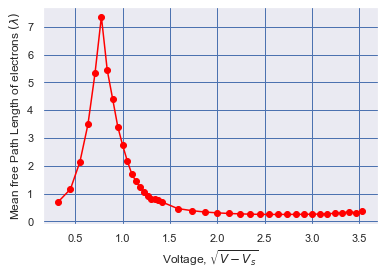

<Figure size 432x288 with 0 Axes>

In [36]:
#--- Actual Plot --- 


plt.scatter(x[0:42], lam[0:42], color = 'red')
plt.plot(x[0:42], lam[0:42], color = 'red')

print(lam)

plt.xlabel("Voltage, $\sqrt{V - V_s}$") 
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.ylabel("Mean free Path Length of electrons $(\lambda)$")
plt.show()

plt.savefig('probvsvolt.png', dpi = 300)

### Correction Calculation 

In [37]:
# --- Error Calculations --- 

v3err = (voltage3*0.005) + 20*1e-3 
sv3err = shield_voltage3*0.005 
vsq3err = np.sqrt(v3err**2 + sv3err**2)
LnIS3err = 0.434*(v3err/voltage3)

In [38]:
vsq3 = -(voltage3 - shield_voltage3*1e-6)
print(len(vsq3))
print(len(LnIS3))
# --- fit one --- 


x_3 = vsq3[0:6]
y_3 = LnIS3[0:6]

# print(x_4)
# print(y_4)

popt1, pcov1 = curve_fit(lin_func, x_3, y_3, p0 = [9, 5], absolute_sigma = True) #parameters and covariance from intial guess. 

# --- fit two -- 

x_4 = vsq3[7:19]
y_4 = LnIS3[7:19]
# y_4 = np.append(y_4, 0)

print(x_4)


popt2, pcov2 = curve_fit(lin_func, x_4, y_4, p0 = [5, 4], absolute_sigma = True) 

# print(*popt1)
# print(*popt2)

x_t2 = np.linspace(-.35, -0.05, 10)
y_t2 = lin_func(x_t2, popt2[0], popt2[1])

x_t3 = np.linspace(-.25, 0, 10)
y_t3 = lin_func(x_t3, popt1[0], popt1[1])
# print(len(x_t2))



m1 = popt1[1]
m2 = popt2[1]

b1 = popt1[0]
b2 = popt2[0]

20
20
[-0.0699987 -0.0799987 -0.0899988 -0.099999  -0.1199992 -0.1399993
 -0.1599994 -0.1799995 -0.1999996 -0.2199997 -0.2499998 -0.2899999]


In [39]:
print(vsq3[19])
print(len(LnIS3))

-0.31999995000000003
20


(xi,yi) -0.1962454467693006 -5.620671817501101


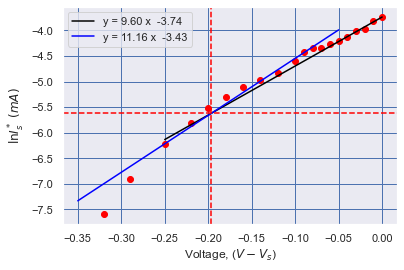

Contact Voltage is: 0.196


<Figure size 432x288 with 0 Axes>

In [40]:
plt.scatter(vsq3, LnIS3, color = 'red')
plt.plot(x_t3, y_t3, color = 'black', label='y = {0:.2f} x  {1:.2f}'.format(popt1[1], popt1[0]))
plt.plot(x_t2, y_t2, color = 'blue', label = 'y = {0:.2f} x  {1:.2f}'.format(popt2[1], popt2[0]))

#Format label='y = %.2f x + %.2f' %(A, B)

# --- Intercept Code --- 

xi = (b1-b2)/(m2-m1)
yi = m1 * xi + b1
contact_voltage = xi 

print('(xi,yi)',xi,yi)

plt.axvline(x = xi, color = 'red',linestyle='--')
plt.axhline(y = yi, color = 'red',linestyle='--')


# plt.errorbar(vsq3, LnIS3, xerr = vsq3err, yerr = LnIS3err, ls='none', color = 'black') 
plt.xlabel("Voltage, (${V - V_s}$)") 
plt.grid(b=True, which = 'major', color='b', linestyle='-')
plt.ylabel("$\ln I_s^*$ $(m A)$")
# plt.xlim(-.6, 0)
# plt.yscale('log')
plt.legend()
plt.show()

plt.savefig('probvsvolt.png', dpi = 300)

print('Contact Voltage is:', np.abs(np.round(contact_voltage, 3)))

In [41]:
good_fit([np.abs(x_t2), np.abs(y_t2)])
good_fit([np.abs(x_t3), np.abs(y_t3)])

p value is 0.9999996923545325
Independent (H0 holds true)
p value is 0.9999967059883559
Independent (H0 holds true)


In [42]:
V_p = voltage3
I_s = IS3*1e-6
I_0 = 1.7
m = popt1[1]

v_bar = (3*V_p*np.log(I_0))/(2*np.log(I_s))

v_b = - 3/(2*m) 

print("V bar:", np.round(np.abs(v_b), 3))

V bar: 0.156


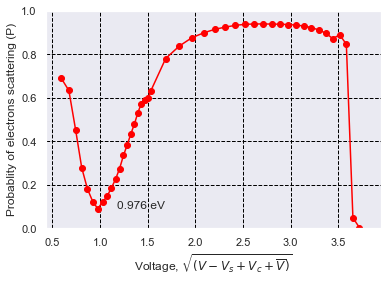

0.9759658789437389


In [43]:
# --- Corrected Diagram --- 
shield_voltagec = shield_voltage1*1e-6
# print(voltage1, shield_voltagec)

P = prob_scat(IP1, IP2, IS1, IS2)
voltage_corrected = np.sqrt(voltage1 - shield_voltagec + np.abs(contact_voltage) + np.abs(v_b))
pt = str(np.round(voltage_corrected[6], 3)) + " eV"

# --- Plot --- 

plt.scatter(voltage_corrected, P, color = 'red')
plt.plot(voltage_corrected, P, color='red')

plt.xlabel("Voltage, $\sqrt{(V - V_s + V_c + \overline{V})}$") 
plt.grid(b=True, which='major', color='black', linestyle='--')
plt.ylabel("Probablity of electrons scattering (P)")
plt.annotate(pt, (voltage_corrected[6] + .2, P[6]))
plt.ylim(0, 1)
plt.savefig('probvsvolt.png', dpi = 300)
plt.show()

print(voltage_corrected[6])

In [44]:
print(len(P))

P_exl = P[0:40]

print(np.round(np.max(P_exl), 3), np.round(np.min(P_exl), 3))

45
0.94 0.091


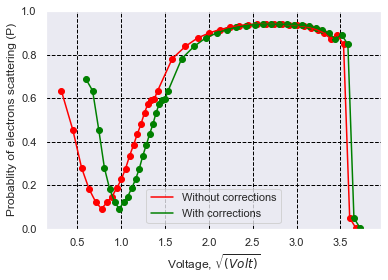

0.774587244924676


In [45]:
# --- Plotting Graph --- 
x = np.sqrt(voltage1 - shield_voltage1*1e-6)
# --- Cubic Spline --- 

data1 = np.array((x, P))

tck,u = interpolate.splprep(data1, s=0)
unew = np.arange(0, 1.01, 0.001)
out = interpolate.splev(unew, tck)

plt.scatter(x, P, color = 'red')
plt.plot(x, P, color='red', label = 'Without corrections')

plt.scatter(voltage_corrected, P, color = 'green')
plt.plot(voltage_corrected, P, color='green', label = 'With corrections')

plt.xlabel("Voltage, $\sqrt{(Volt)}$") 
plt.grid(b=True, which='major', color='black', linestyle='--')
plt.ylabel("Probablity of electrons scattering (P)")
plt.legend()
plt.ylim(0, 1)
plt.savefig('probvsvolt.png', dpi = 300)
plt.show()

print(x[6])

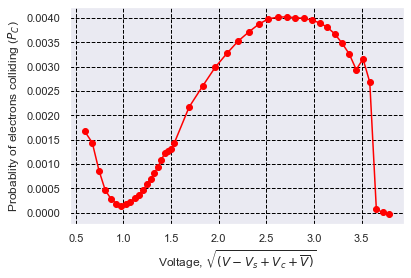

In [46]:
P_C = prob_col(IP1, IP2, IS1, IS2)

plt.xlabel("Voltage, $\sqrt{(V - V_s + V_c + \overline{V})}$") 
plt.grid(b=True, which='major', color='black', linestyle='--')
plt.ylabel("Probablity of electrons colliding ($P_C$)")
plt.scatter(voltage_corrected, P_C, color = 'red')
plt.plot(voltage_corrected, P_C, color = 'red')

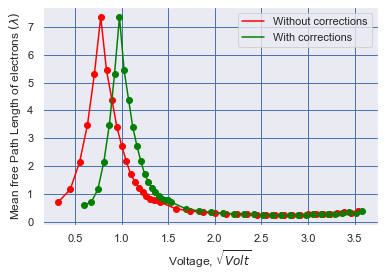

0.774587244924676 0.9759658789437389
7.357658611452489


<Figure size 432x288 with 0 Axes>

In [47]:
#--- Actual Plot --- 


plt.scatter(x[0:42], lam[0:42], color = 'red')
plt.plot(x[0:42], lam[0:42], color = 'red',  label = 'Without corrections')

plt.scatter(voltage_corrected[0:42], lam[0:42], color = 'green')
plt.plot(voltage_corrected[0:42], lam[0:42], color = 'green',  label = 'With corrections')

plt.xlabel("Voltage, $\sqrt{Volt}$") 
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.legend()
plt.ylabel("Mean free Path Length of electrons $(\lambda)$")
plt.show()

print(x[6], voltage_corrected[6])
print(lam[6])
plt.savefig('probvsvolt.png', dpi = 300)

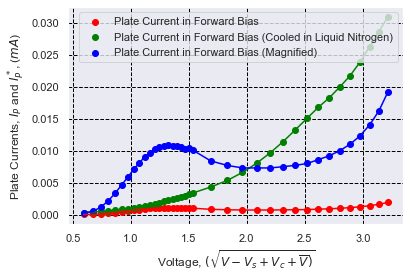

<Figure size 432x288 with 0 Axes>

In [48]:
# --- Plotting Graph --- 

cathode_plate_voltage = voltage_corrected[0:37] 

plt.plot(cathode_plate_voltage, plate_current, color = 'red')
plt.plot(cathode_plate_voltage, plate_current_cooled, color = 'green')
plt.scatter(cathode_plate_voltage, plate_current, color = 'red', label = 'Plate Current in Forward Bias')
plt.scatter(cathode_plate_voltage, plate_current_cooled, color = 'green', label = 'Plate Current in Forward Bias (Cooled in Liquid Nitrogen)')
plt.plot(cathode_plate_voltage, plate_current*10, color = 'blue')
plt.scatter(cathode_plate_voltage, plate_current*10, color = 'blue', label = 'Plate Current in Forward Bias (Magnified)')


# plt.errorbar(temp, counts, xerr = None, yerr = std, ls='none', color = 'black') 
plt.xlabel("Voltage, $(\sqrt{V - V_s + V_c + \overline{V})}$") 
plt.grid(b=True, which='major', color='black', linestyle='--')
plt.ylabel("Plate Currents, $I_P$ and $I_P^*$, ($m A$)")
plt.legend()
plt.show()

plt.savefig('compare.png', dpi = 300)

No handles with labels found to put in legend.
-3.737059703243955 9.598246202733334
-3.430698652341786 11.159357840968266
(xi,yi) -0.1962454467693006 -5.620671817501101


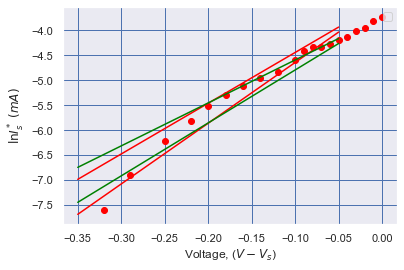

Contact Voltage is: 0.196


<Figure size 432x288 with 0 Axes>

In [49]:
print(*popt1)
print(*popt2)

plt.scatter(vsq3, LnIS3, color = 'red')
# plt.plot(x_t3, y_t3, color = 'black')
# plt.plot(x_t2, y_t2, color = 'blue')
plt.plot(x_t2, lin_func(popt2[1] + 1, popt2[0], x_t2), color = 'red')
plt.plot(x_t2, lin_func(popt2[1] - 1, popt2[0], x_t2), color = 'red')
plt.plot(x_t2, lin_func(popt1[1] + 1, popt1[0], x_t2), color = 'green')
plt.plot(x_t2, lin_func(popt1[1] - 1, popt1[0], x_t2), color = 'green')

#Format label='y = %.2f x + %.2f' %(A, B)

# --- Intercept Code --- 

xi = (b1-b2)/(m2-m1)
yi = m1 * xi + b1
contact_voltage = xi 

print('(xi,yi)',xi,yi)

# plt.axvline(x = xi, color = 'red',linestyle='--')
# plt.axhline(y = yi, color = 'red',linestyle='--')


# plt.errorbar(vsq3, LnIS3, xerr = vsq3err, yerr = LnIS3err, ls='none', color = 'black') 
plt.xlabel("Voltage, (${V - V_s}$)") 
plt.grid(b=True, which = 'major', color='b', linestyle='-')
plt.ylabel("$\ln I_s^*$ $(m A)$")
# plt.xlim(-.6, 0)
# plt.yscale('log')
plt.legend()
plt.show()

plt.savefig('probvsvolt.png', dpi = 300)

print('Contact Voltage is:', np.abs(np.round(contact_voltage, 3)))